# Confined Aquifer Test
This example is taken from Kruseman and de Ridder (1970), pp xx

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

Set basic parameters for the model:

In [2]:
H = 7 #aquifer thickness
zt = -18 #top boundary of aquifer
zb = zt - H #bottom boundary of aquifer
Q = 788 #constant discharge

Create conceptual model:

In [3]:
#unkonwn parameters: kaq, Saq
ml = ModelMaq(kaq=60, z=[zt, zb], Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, Q)], layers=0)
ml.solve(silent='True')

Load data of two observation wells:

In [4]:
#time and drawdown of pizometer 30m away from pumping well
data1 = np.loadtxt('data/piezometer_h30.txt', skiprows = 1)
t1 = data1[:, 0] / 60 / 24 #convert min to days
h1 = data1[:, 1]
r1 = 30
#time and drawdown of piezometer 90m away from pumping well
data2 = np.loadtxt('data/piezometer_h90.txt', skiprows = 1)
t2 = data2[:, 0] / 60 / 24 #convert min to days
h2 = data2[:, 1]
r2 = 90

Calibrate using only the data from observation well 1

.........................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03408049
    reduced chi-square = 0.00106502
    Akaike info crit   = -230.783289
    Bayesian info crit = -227.730568
[[Variables]]
    kaq0:  68.6394868 +/- 1.43827068 (2.10%) (init = 10)
    Saq0:  1.6072e-05 +/- 1.5823e-06 (9.85%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.891


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,68.6395,1.438271,2.0954,-inf,inf,10,[68.63948675671419]
Saq0,1.60717e-05,0.000002,9.84519,-inf,inf,0.0001,[1.6071655613732773e-05]


rmse: 0.031660183647463674


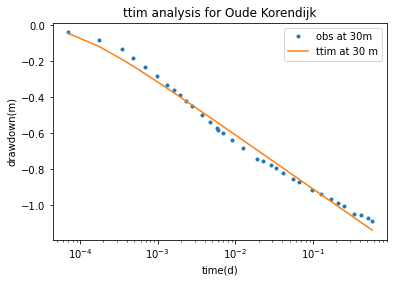

In [5]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca.fit(report=True)
display(ca.parameters)
print('rmse:', ca.rmse())
hm1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, '.', label='obs at 30m')
plt.semilogx(t1, hm1[0], label='ttim at 30 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis for Oude Korendijk')
plt.legend();

Calibrate using only the data from observation well 2

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 35
    # variables        = 2
    chi-square         = 0.01806492
    reduced chi-square = 5.4742e-04
    Akaike info crit   = -260.919608
    Bayesian info crit = -257.808912
[[Variables]]
    kaq0:  71.5831423 +/- 1.57402551 (2.20%) (init = 10)
    Saq0:  2.9106e-05 +/- 1.9379e-06 (6.66%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.847


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,71.5831,1.574026,2.19888,-inf,inf,10,[71.58314231775141]
Saq0,2.91065e-05,0.000002,6.65787,-inf,inf,0.0001,[2.910648177493867e-05]


rmse: 0.022718724430908815


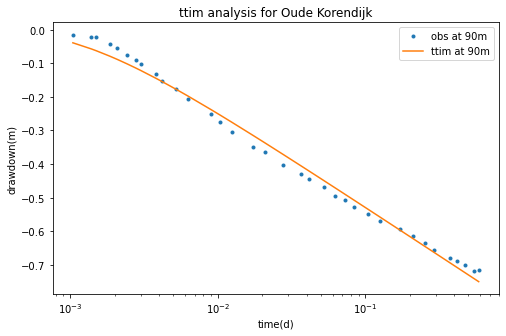

In [6]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca.fit(report=True)
display(ca.parameters)
print('rmse:', ca.rmse())
hm2 = ml.head(r2, 0 ,t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t2, h2, '.', label='obs at 90m')
plt.semilogx(t2, hm2[0], label = 'ttim at 90m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis for Oude Korendijk')
plt.legend();

Calibrate model with two datasets simultaneously:

In [7]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca.fit(report=True)
display(ca.parameters)

..................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 69
    # variables        = 2
    chi-square         = 0.17291362
    reduced chi-square = 0.00258080
    Akaike info crit   = -409.245802
    Bayesian info crit = -404.777589
[[Variables]]
    kaq0:  66.0893566 +/- 1.65498708 (2.50%) (init = 10)
    Saq0:  2.5409e-05 +/- 2.4016e-06 (9.45%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.855


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,66.0894,1.654987,2.50417,-inf,inf,10,[66.0893566210241]
Saq0,2.54086e-05,0.000002,9.45189,-inf,inf,0.0001,[2.5408624326744147e-05]


rmse: 0.050059909702252964


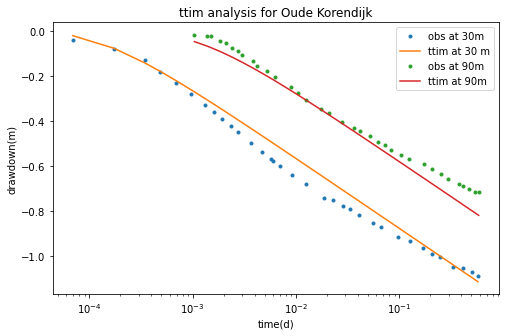

In [8]:
print('rmse:', ca.rmse())
hm1 = ml.head(r1, 0, t1)
hm2 = ml.head(r2, 0 ,t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label='obs at 30m')
plt.semilogx(t1, hm1[0], label='ttim at 30 m')
plt.semilogx(t2, h2, '.', label='obs at 90m')
plt.semilogx(t2, hm2[0], label = 'ttim at 90m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis for Oude Korendijk')
plt.legend();

Investigate whether adding well bore storage improves the fit

Create conceptual model:

In [10]:
#unkonwn parameters: kaq, Saq and rc
ml = ModelMaq(kaq=60, z=[zt, zb], Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.2, rc=0.2, tsandQ=[(0, Q)], layers=0)
ml.solve(silent='True')

Calibrate using only the data from observation well 1

..............................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 107
    # data points      = 34
    # variables        = 3
    chi-square         = 0.00793101
    reduced chi-square = 2.5584e-04
    Akaike info crit   = -278.353420
    Bayesian info crit = -273.774339
[[Variables]]
    kaq0:  81.0504417 +/- 1.75101696 (2.16%) (init = 10)
    Saq0:  5.3971e-06 +/- 7.9748e-07 (14.78%) (init = 0.0001)
    rc:    0.30539594 +/- 0.01764557 (5.78%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.976
    C(Saq0, rc)   = -0.875
    C(kaq0, rc)   =  0.835


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,81.0504,1.751017e+00,2.1604,-inf,inf,10,[81.05044169941328]
Saq0,5.39706e-06,7.974796e-07,14.7762,-inf,inf,0.0001,[5.397059276166974e-06]
rc,0.305396,1.764557e-02,5.77793,0.01,inf,0.2,[0.30539593886811867]


rmse: 0.015273011793820228


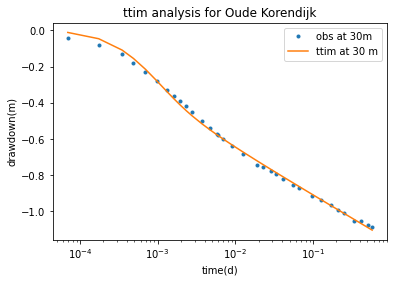

In [13]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.set_parameter_by_reference(name='rc', parameter=w.rc[0:], initial=0.2, pmin=0.01)
ca.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca.fit(report=True)
display(ca.parameters)
print('rmse:', ca.rmse())
hm1 = ml.head(r1, 0, t1)
plt.semilogx(t1, h1, '.', label='obs at 30m')
plt.semilogx(t1, hm1[0], label='ttim at 30 m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis for Oude Korendijk')
plt.legend();

Calibrate using only the data from observation well 2

.....................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 98
    # data points      = 35
    # variables        = 3
    chi-square         = 0.00135387
    reduced chi-square = 4.2309e-05
    Akaike info crit   = -349.604655
    Bayesian info crit = -344.938611
[[Variables]]
    kaq0:  88.2895898 +/- 1.48506422 (1.68%) (init = 10)
    Saq0:  1.1359e-05 +/- 9.4427e-07 (8.31%) (init = 0.0001)
    rc:    0.67472113 +/- 0.03065095 (4.54%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.982
    C(Saq0, rc)   = -0.942
    C(kaq0, rc)   =  0.915


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,88.2896,1.485064e+00,1.68204,-inf,inf,10,[88.28958983520761]
Saq0,1.13593e-05,9.442702e-07,8.31274,-inf,inf,0.0001,[1.1359310348431427e-05]
rc,0.674721,3.065095e-02,4.54276,0.01,inf,0.2,[0.6747211333571737]


rmse: 0.006219495428404363


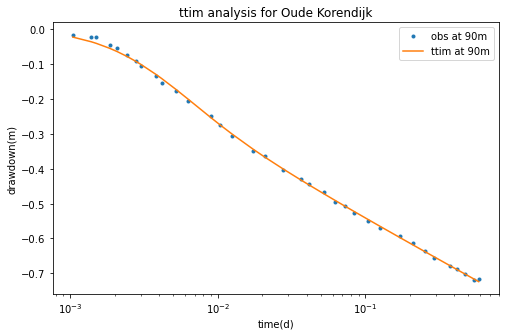

In [14]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.set_parameter_by_reference(name='rc', parameter=w.rc[0:], initial=0.2, pmin=0.01)
ca.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca.fit(report=True)
display(ca.parameters)
print('rmse:', ca.rmse())
hm2 = ml.head(r2, 0 ,t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t2, h2, '.', label='obs at 90m')
plt.semilogx(t2, hm2[0], label = 'ttim at 90m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis for Oude Korendijk')
plt.legend();

Calibrate model with two datasets simultaneously (not much improvement, `rc` approaches minimum value).

In [17]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.set_parameter_by_reference(name='rc', parameter=w.rc[0:], initial=0.2, pmin=0.01)
ca.series(name='obs1', x=r1, y=0, t=t1, h=h1, layer=0)
ca.series(name='obs2', x=r2, y=0, t=t2, h=h2, layer=0)
ca.fit(report=True)
display(ca.parameters)

............................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 73
    # data points      = 69
    # variables        = 3
    chi-square         = 0.17294884
    reduced chi-square = 0.00262044
    Akaike info crit   = -407.231751
    Bayesian info crit = -400.529431
[[Variables]]
    kaq0:  66.0870106 +/- 1.69523201 (2.57%) (init = 10)
    Saq0:  2.5407e-05 +/- 2.4950e-06 (9.82%) (init = 0.0001)
    rc:    0.01000367 +/- 0.03290855 (328.96%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.860
    C(Saq0, rc)   = -0.244
    C(kaq0, rc)   =  0.180


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,66.087,1.695232,2.56515,-inf,inf,10,[66.08701056954243]
Saq0,2.54067e-05,0.000002,9.82034,-inf,inf,0.0001,[2.5406717388181246e-05]
rc,0.0100037,0.032909,328.965,0.01,inf,0.2,[0.010003671865020713]


rmse: 0.050065007003576


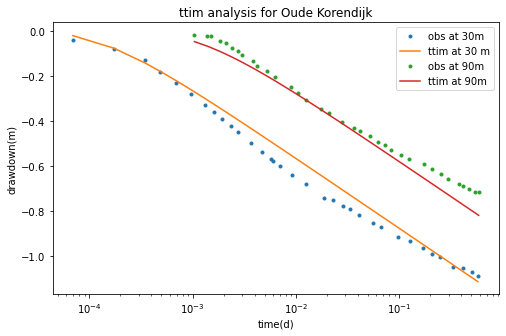

In [18]:
print('rmse:', ca.rmse())
hm1 = ml.head(r1, 0, t1)
hm2 = ml.head(r2, 0 ,t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, h1, '.', label='obs at 30m')
plt.semilogx(t1, hm1[0], label='ttim at 30 m')
plt.semilogx(t2, h2, '.', label='obs at 90m')
plt.semilogx(t2, hm2[0], label = 'ttim at 90m')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.title('ttim analysis for Oude Korendijk')
plt.legend();

## Summary of values presented in Kruseman and de Ridder (1970).
To be added